In [102]:
import matplotlib.pyplot as plt
from utils import get_params_from_file as get_params, get_all_params, comm_dict, get_pandas_dataframe

In [103]:
import numpy as np
np.random.seed(1)

In [104]:
def set_bounds(y_bound = None, x_bound = None, y_step = None, x_step = None):
    if y_bound is not None: 
        plt.ylim(y_bound)
        if y_step is not None: plt.yticks(np.arange(y_bound[0],y_bound[1],y_step))
    if x_bound is not None: 
        plt.xlim(x_bound)
        if x_step is not None: plt.xticks(np.arange(x_bound[0],x_bound[1],x_step))

In [105]:
prefix = "history/FaceModel_whaleType"
types = [14.1,14.2,14.3,14.4]
filenames = [f"test/history_test{i}.txt" for i in types]
filenames = [prefix+'/'+f for f in filenames]

In [106]:
train_filenames = [f"train/history{i}.txt" for i in types]

train_filenames = [prefix+'/'+f for f in train_filenames]

In [114]:
acc = [get_params(f, "Test accuracy", with_name = False) for f in filenames]

In [115]:
test_examples = [get_params(f, "test_examples") for f in filenames]
test_start_folder = [get_params(f, "start_folder") for f in filenames]

In [116]:
title = [get_params(f, "load_model_name", with_name = False) for f in filenames]
title = [t[t.index('/')+1:-3] for t in title]
title = [t[t.index('/')+1:] for t in title]

In [121]:
params = [get_all_params(f, False, False, 
                        "input_shape",
                         "start_folder",
                         "num_folders",
                         "batch_size_folder",
                         "num_folders_val",
                         "start_folder_val",
                         "batch_size_folder_val",
                         "epochs",
                         "learning_rate",
                         "l2",
                        "all_examples") for f in train_filenames]


In [122]:
for i in range(len(params)):
    params[i]["Accuracy"] = acc[i]
    params[i]["Test examples"] = test_examples[i]
    params[i]["Test start folder"] = test_start_folder[i]

In [123]:
all_params = get_pandas_dataframe(comm_dict(params, title))

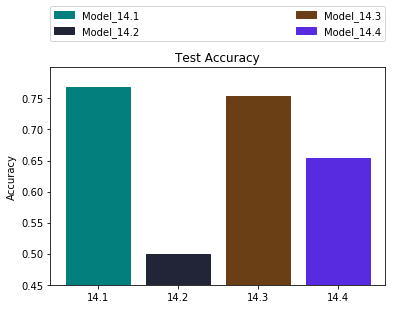

,Model_14.1,Model_14.2,Model_14.3,Model_14.4
input_shape,"(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)"
start_folder,0,0,0,0
num_folders,1000,1000,1000,1000
batch_size_folder,8,8,8,8
num_folders_val,80,80,80,80
start_folder_val,5000,5000,5000,5000
batch_size_folder_val,2,2,2,2
epochs,40,40,40,40
learning_rate,0.001,0.001,0.001,0.001
l2,0.0007,0.0007,0.0007,0.0007


In [124]:
fig, ax = plt.subplots()
ind = np.arange(1,len(types)+1)

np.random.seed(9)
bars = plt.bar(ind, acc)
colors = [np.random.rand(1,3) for _ in range(len(bars))]

[b.set_color(c[0]) for b,c in zip(bars,colors)]
ax.set_xticks(ind)
ax.set_xticklabels(types)
plt.legend(bars, title, bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)
ax.set_ylabel("Accuracy")
ax.set_title("Test Accuracy")

set_bounds(y_bound = (.45,.8), y_step = .05)
#plt.savefig("history/test_accuracy.jpg", bbox_inches = "tight", quality = 100, dpi = 150)#save_fig
plt.show()
all_params